In [69]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure
import os

RAW_PATH = "../data/raw/"
PATH_SAVE_FIGURES = "../reports/figures/"

# Full Dataset Analysis

In [21]:
data_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
data = pd.read_csv(os.path.join(RAW_PATH, "u.data"), sep="\t", names=data_cols, encoding='latin-1')
print(data.shape)
data.head()

(100000, 4)


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Rating distribution in dataset


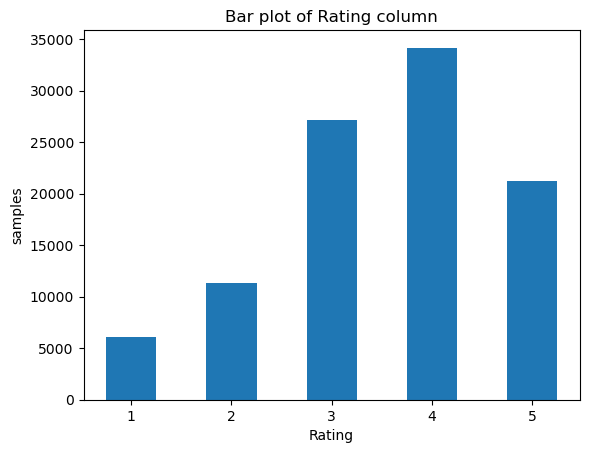

In [72]:
print("Rating distribution in dataset")

categories = data['rating'].value_counts().index
counts = data['rating'].value_counts().values
_ = plt.bar(categories, counts, width=0.5)
plt.title('Bar plot of Rating column')
plt.xlabel('Rating')
plt.ylabel('samples')
plt.savefig(os.path.join(PATH_SAVE_FIGURES, "bar_plot_rating.png"), bbox_inches = 'tight')
plt.show()

# Item Analysis

In [31]:
item_cols = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'action', 'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']
items = pd.read_csv(os.path.join(RAW_PATH, "u.item"), sep="|", names=item_cols, encoding='latin-1')

items.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
print(f"Unique number of movies - {len(items.movie_id.unique())}")

Unique number of movies - 1682


Genres distribution in Items dataset


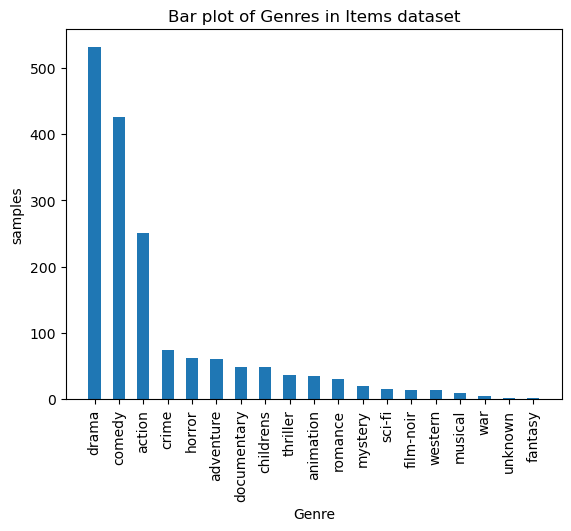

In [73]:
items["genre"] = items[['unknown', 'action', 'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']].idxmax(1)

print("Genres distribution in Items dataset")

categories = items['genre'].value_counts().index
counts = items['genre'].value_counts().values
_ = plt.bar(categories, counts, width=0.5)
plt.title('Bar plot of Genres in Items dataset')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel('samples')
plt.savefig(os.path.join(PATH_SAVE_FIGURES, "bar_plot_genre.png"), bbox_inches = 'tight')
plt.show()

Years distribution in Items dataset


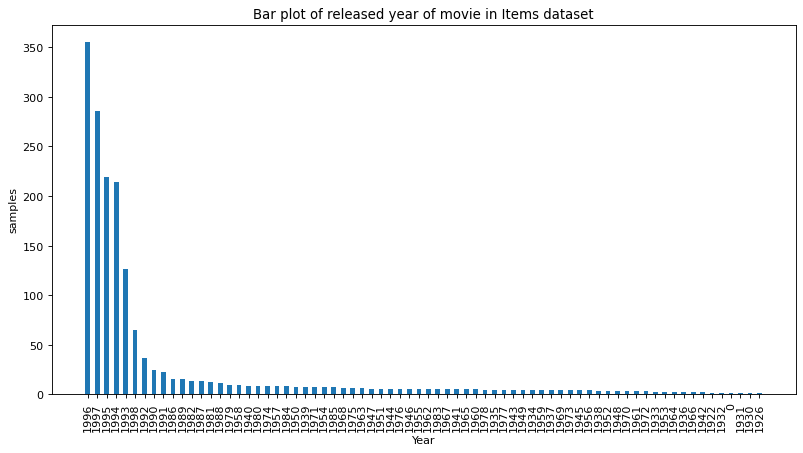

In [91]:
items['year'] = pd.to_datetime(items['release_date']).dt.year
items['year'] = items['year'].fillna(0)
items['year'] = items['year'].astype(int).astype(str)

print("Years distribution in Items dataset")

categories = items['year'].value_counts().index
counts = items['year'].value_counts().values
figure(figsize=(12, 6), dpi=80)
_ = plt.bar(categories, counts, width=0.5)
plt.title('Bar plot of released year of movie in Items dataset')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('samples')
plt.savefig(os.path.join(PATH_SAVE_FIGURES, "bar_plot_year.png"), bbox_inches = 'tight')
plt.show()

items['year'] = items['year'].astype(int)

# User Analysis

In [19]:
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv(os.path.join(RAW_PATH, "u.user"), sep="|", names=user_cols, encoding='latin-1')
users.head()

(943, 5)


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [77]:
print(f"Unique number of users - {len(users.user_id.unique())}")

Unique number of users - 943


Gender distribution in Users dataset


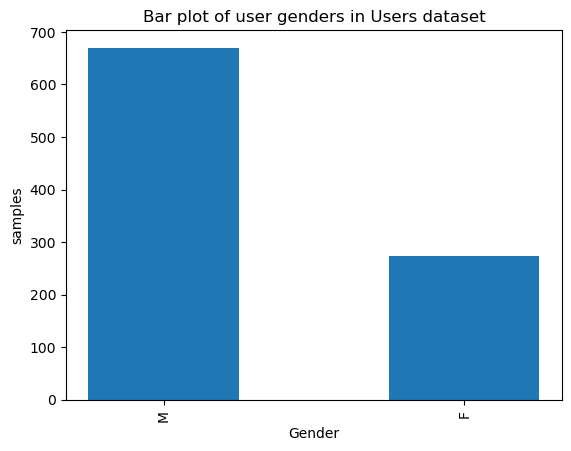

In [88]:
print("Gender distribution in Users dataset")

categories = users['gender'].value_counts().index
counts = users['gender'].value_counts().values
_ = plt.bar(categories, counts, width=0.5)
plt.title('Bar plot of user genders in Users dataset')
plt.xlabel('Gender')
plt.xticks(rotation=90)
plt.ylabel('samples')
plt.savefig(os.path.join(PATH_SAVE_FIGURES, "bar_plot_gender.png"), bbox_inches = 'tight')
plt.show()

Age distribution in Users dataset


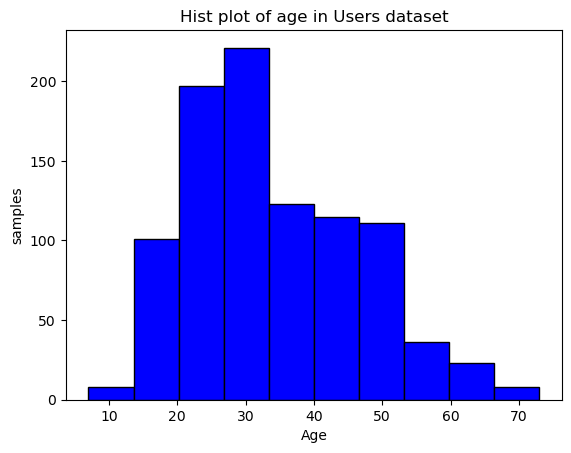

In [86]:
print("Age distribution in Users dataset")

_ = plt.hist(users["age"], color = 'blue', edgecolor = 'black')
plt.title('Hist plot of age in Users dataset')
plt.xlabel('Age')
plt.ylabel('samples')
plt.savefig(os.path.join(PATH_SAVE_FIGURES, "hist_plot_age.png"), bbox_inches = 'tight')
plt.show()

Occupation distribution in Users dataset


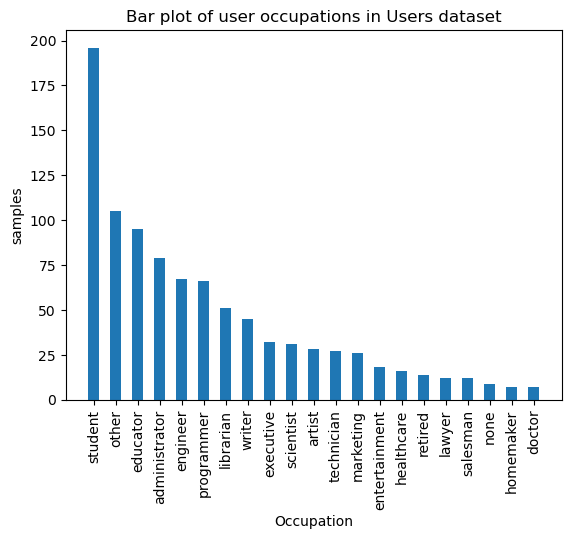

In [89]:
print("Occupation distribution in Users dataset")

categories = users['occupation'].value_counts().index
counts = users['occupation'].value_counts().values
_ = plt.bar(categories, counts, width=0.5)
plt.title('Bar plot of user occupations in Users dataset')
plt.xlabel('Occupation')
plt.xticks(rotation=90)
plt.ylabel('samples')
plt.savefig(os.path.join(PATH_SAVE_FIGURES, "bar_plot_occupation.png"), bbox_inches = 'tight')
plt.show()

Area (First symbol of zipcode) distribution in Users dataset


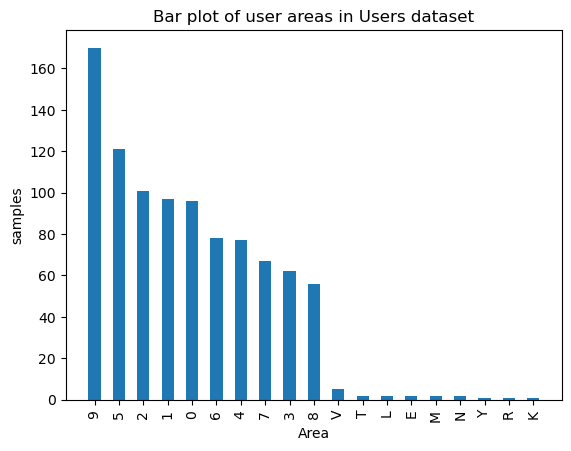

In [90]:
users['area'] = users['zip_code'].str[0]

print("Area (First symbol of zipcode) distribution in Users dataset")

categories = users['area'].value_counts().index
counts = users['area'].value_counts().values
_ = plt.bar(categories, counts, width=0.5)
plt.title('Bar plot of user areas in Users dataset')
plt.xlabel('Area')
plt.xticks(rotation=90)
plt.ylabel('samples')
plt.savefig(os.path.join(PATH_SAVE_FIGURES, "bar_plot_area.png"), bbox_inches = 'tight')
plt.show()